<a href="https://colab.research.google.com/github/SarahLares/Clustering_on_Survery/blob/master/Tarea_3_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd

## Importamos la Data

In [0]:
url = 'https://raw.githubusercontent.com/SarahLares/Clustering_on_Survery/master/turkiye-student-evaluation_generic.csv'
df = pd.read_csv(url) 

In [0]:
df.shape

(5820, 33)

In [0]:
df.describe()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
count,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000,5820.00000,5820.000000,5820.000000,5820.000000,5820.000000,5820.000000
mean,2.485567,7.276289,1.214089,1.675601,2.783505,2.929897,3.073883,3.178694,3.082474,3.105842,3.107388,3.066323,3.041924,3.165979,3.090722,3.183849,3.035567,3.242784,3.290893,3.287285,3.169588,3.398454,3.222509,3.261684,3.285395,3.307388,3.317526,3.20189,3.166838,3.312543,3.222165,3.154811,3.308076
std,0.718473,3.688175,0.532376,1.474975,1.348987,1.341077,1.285251,1.253567,1.284594,1.278989,1.280807,1.279097,1.283481,1.268930,1.275309,1.295443,1.305772,1.264201,1.255373,1.253122,1.288015,1.267530,1.279799,1.268442,1.276848,1.269974,1.268358,1.27259,1.275909,1.257286,1.270695,1.291872,1.278709
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,4.000000,1.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.00000,2.000000,3.000000,2.000000,2.000000,3.000000
50%,3.000000,7.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,10.000000,1.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000
max,3.000000,13.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000


Podemos observar que solo tres instructores impartieron 13 materias

In [0]:
df.groupby(['instr','class']).count()

nb.repeat  attendance  difficulty   Q1  ...  Q25  Q26  Q27  Q28
instr class                                          ...                    
1     2            140         140         140  140  ...  140  140  140  140
      7            187         187         187  187  ...  187  187  187  187
      10           448         448         448  448  ...  448  448  448  448
2     1            303         303         303  303  ...  303  303  303  303
      6            558         558         558  558  ...  558  558  558  558
      11           484         484         484  484  ...  484  484  484  484
      13            99          99          99   99  ...   99   99   99   99
3     3            904         904         904  904  ...  904  904  904  904
      4            187         187         187  187  ...  187  187  187  187
      5            656         656         656  656  ...  656  656  656  656
      8            500         500         500  500  ...  500  500  500  500
      9            571         571         571  571  ...  571  571  571  571
      12            41          41          41   41  ...   41   41   41   41
      13           742         742         742  742  ...  742  742  742  742

[14 rows x 31 columns]

## Visualicemos un poco los datos

In [0]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


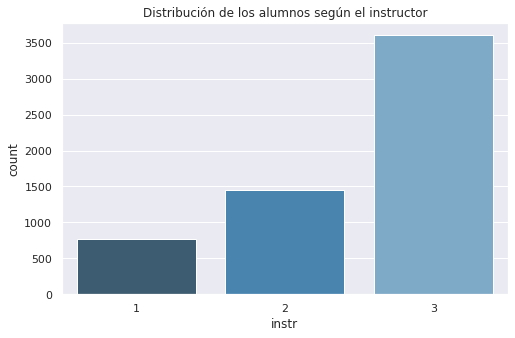

In [0]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos según el instructor")
sns.countplot(x='instr', data=df, palette="Blues_d")
plt.show()

Podemos observar que el instructor **3** tuvo mas alumnos que respondieron la encuenta que los otros dos instructores.

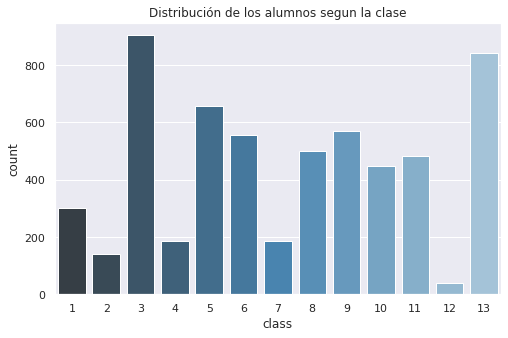

In [0]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos segun la clase")
sns.countplot(x='class', data=df, palette="Blues_d")
plt.show()

Podemos observar claramente, que hay una desigualdad en la cantidad de alumnos que realizaron la encuesta en cada clase.

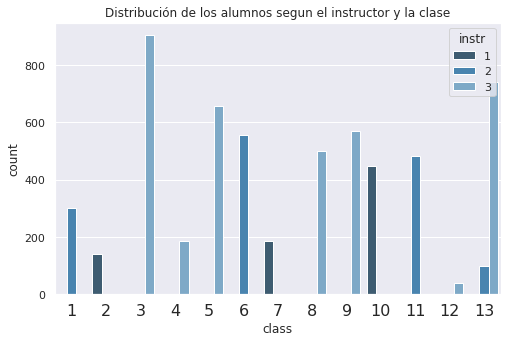

In [0]:
plt.figure(figsize=(8,5))
plt.title("Distribución de los alumnos segun el instructor y la clase")
sns.countplot(x='class', data=df,hue='instr', palette="Blues_d")
plt.tick_params(axis='x', labelsize=16)
plt.show()

Por otra parte, podemos observar que el instructor 3 tuvo más alumnos debido a que imparte más clases con más alumnos que los otros dos instructores.

### Sobre las preguntas en la encuesta

Q1: El contenido del curso semestral, el método de enseñanza y el sistema de evaluación se proporcionaron al principio.

Q2: Las metas y objetivos del curso se establecieron claramente al comienzo del período.

Q3: El curso valió la cantidad de crédito asignado.

Q4: El curso se impartió de acuerdo con el plan de estudios anunciado el primer día de clase.

Q5: Las discusiones en clase, tareas, solicitudes y estudios fueron 
satisfactorios.

Q6: El libro de texto y otros recursos de los cursos fueron suficientes y actualizados.

Q7: El curso permitió trabajo de campo, aplicaciones, laboratorio, discusión y otros estudios.

Q8: Los cuestionarios, tareas, proyectos y exámenes contribuyeron a ayudar al aprendizaje.

Q9: Disfruté mucho la clase y estaba ansioso por participar activamente durante las conferencias.

Q10: Mis expectativas iniciales sobre el curso se cumplieron al final del período o año.

Q11: El curso fue relevante y beneficioso para mi desarrollo profesional.

Q12: El curso me ayudó a mirar la vida y el mundo con una nueva perspectiva.

Q13: El conocimiento del Instructor era relevante y actualizado.

Q14: El instructor vino preparado para las clases.

Q15: El instructor enseñó de acuerdo con el plan de lección anunciado.

Q16: El instructor estaba comprometido con el curso y era comprensible.

Q17: El instructor llegó a tiempo para las clases.

Q18: El Instructor tiene una entrega / discurso suave y fácil de seguir.

Q19: El instructor hizo un uso efectivo de las horas de clase.

Q20: El instructor explicó el curso y estaba ansioso por ayudar a los estudiantes.

Q21: El instructor demostró un enfoque positivo para los estudiantes.

Q22: El instructor fue abierto y respetuoso con las opiniones de los estudiantes sobre el curso.

Q23: El instructor alentó la participación en el curso.

Q24: El instructor asignó tareas / proyectos relevantes y ayudó / guió a los estudiantes.

Q25: El instructor respondió a las preguntas sobre el curso dentro y fuera del curso.

Q26: El sistema de evaluación del Instructor (preguntas intermedias y finales, proyectos, tareas, etc.) midió efectivamente los objetivos del curso.

Q27: El instructor brindó soluciones a los exámenes y los discutió con los estudiantes.

Q28: El Instructor trató a todos los estudiantes de manera correcta y objetiva.

In [0]:
X_Q = df.iloc [:, 5:33] 
Q_means = X_Q.mean(axis = 0) 
Q_means = Q_means.to_frame('mean')
Q_means.reset_index(level=0, inplace=True)

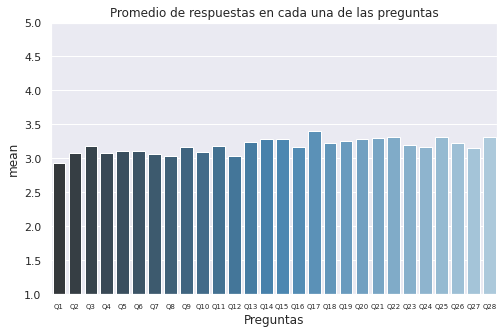

In [0]:
plt.figure(figsize=(8,5))
plt.title("Promedio de respuestas en cada una de las preguntas")
sns.barplot(x='index', y = 'mean', data = Q_means, palette="Blues_d")
plt.tick_params(axis='x', labelsize=7)
plt.xlabel('Preguntas')
plt.ylim(1,5)
plt.show()

Podemos observar que la media de cada pregunda está cercana a **3**

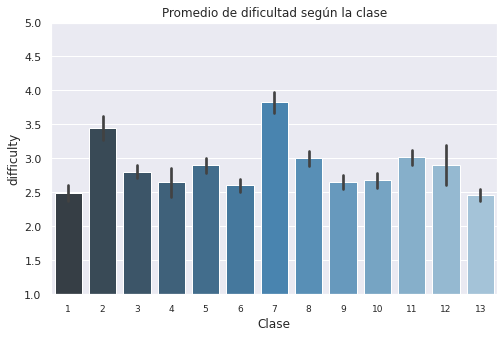

In [0]:
plt.figure(figsize=(8,5))
plt.title("Promedio de dificultad según la clase")
sns.barplot(x='class', y = 'difficulty', data = df, palette="Blues_d")
plt.tick_params(axis='x', labelsize=9)
plt.xlabel('Clase')
plt.ylim(1,5)
plt.show()

Podemos observar que las clases que fueron puntuadas con la mayor dificultad son la 2 y la 7. Sin embargo, en ambas clases menos de 200 alumnos respondieron la encuesta, que es un número bajo comparado con clases como la 13 o la 3.

##Selección de los Datos

Sabemos que las respuestas a las preguntas de la encuesta se encuentran de la columna 5 a la 33 y que estas están escaladas con valores discretos del 1 al 5. Separaremos las respuestas de las encuestas por materias.

In [0]:
df_C1 = df.loc[df['class']==1].iloc[:,5:]
df_C2 = df.loc[df['class']==2].iloc[:,5:]
df_C3 = df.loc[df['class']==3].iloc[:,5:]
df_C4 = df.loc[df['class']==4].iloc[:,5:]
df_C5 = df.loc[df['class']==5].iloc[:,5:]
df_C6 = df.loc[df['class']==6].iloc[:,5:]
df_C7 = df.loc[df['class']==7].iloc[:,5:]
df_C8 = df.loc[df['class']==8].iloc[:,5:]
df_C9 = df.loc[df['class']==9].iloc[:,5:]
df_C10 = df.loc[df['class']==10].iloc[:,5:]
df_C11 = df.loc[df['class']==11].iloc[:,5:]
df_C12 = df.loc[df['class']==12].iloc[:,5:]
df_C13 = df.loc[df['class']==13].iloc[:,5:]

Ralicemos una agrupación mediante el algoritmo de *Kmeans* en dos materias a ver que resultados obtenemos.


*   clase 7, instructor 1, 187 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 3.75
*   clase 3, instructor 3, 904 alumnos respondieron la encuesta, promedio de dificultad de la clase según los alumnos 2.90 


In [0]:
X_1 = np.array(df_C1)
X_7 = np.array(df_C7)
X_9 = np.array(df_C8)

In [0]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [95]:
dis_1 = []
sil_1 = []
dis_7 = []
sil_7 = []
dis_9 = []
sil_9 = []
for i in range(2,9):
  print(i)
  model_1 = KMeans(n_clusters= i, random_state=2)
  model_1.fit(X_1)
  dis_1.append(model_1.inertia_)
  sil_1.append(silhouette_score(X_1, model_1.fit_predict(X_1)))
  model_7 = KMeans(n_clusters= i, random_state=3)
  model_7.fit(X_7)
  dis_7.append(model_7.inertia_)
  sil_7.append(silhouette_score(X_7, model_7.fit_predict(X_7)))
  model_9 = KMeans(n_clusters= i, random_state=3)
  model_9.fit(X_9)
  dis_9.append(model_9.inertia_)
  sil_9.append(silhouette_score(X_9, model_9.fit_predict(X_9)))

2
3
4
5
6
7
8


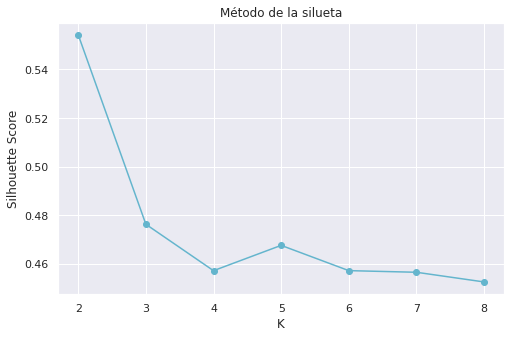

In [86]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(2,8,7),sil_7,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Método de la silueta') 
plt.show()

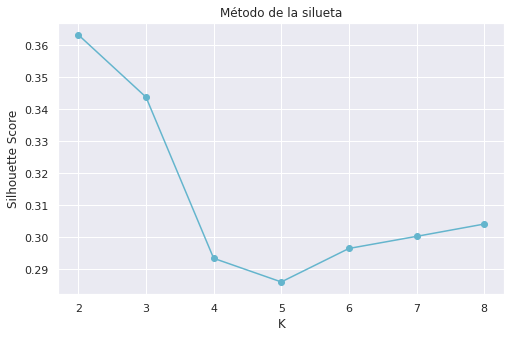

In [96]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(2,8,7),sil_9,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Método de la silueta') 
plt.show()

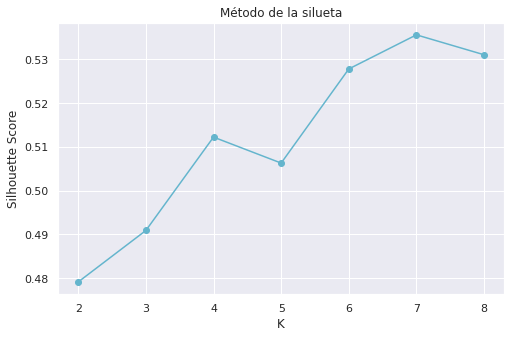

In [90]:
plt.figure(figsize=(8,5))
plt.plot(np.linspace(2,8,7),sil_1,'co-')
plt.xlabel ('K') 
plt.ylabel ('Silhouette Score')
plt.title('Método de la silueta') 
plt.show()

## K Means

In [0]:
model_C1 = KMeans(n_clusters=7,random_state=1).fit(X_1)
model_C7 = KMeans(n_clusters=2, random_state = 4).fit(X_7)
model_C9 = KMeans(n_clusters=2, random_state = 4).fit(X_9)

Como podemos observar se tienen 28 características, lo cual dificultará la visualización de los clusters, por lo cual reduciremos la dimencionalidad utilizando el análisis de componentes principales ( PCA ). 

In [0]:
from sklearn.decomposition import PCA

In [107]:
X=model_1.predict(X_1)
X = pd.cat

array([1, 0, 3, 0, 7, 0, 3, 2, 5, 7, 6, 1, 1, 2, 6, 2, 0, 2, 2, 7, 1, 2,
       7, 4, 6, 3, 2, 2, 1, 2, 3, 6, 2, 1, 2, 0, 7, 6, 4, 7, 2, 0, 1, 0,
       1, 1, 2, 6, 2, 1, 7, 3, 4, 1, 2, 2, 7, 1, 4, 1, 1, 3, 2, 2, 1, 0,
       2, 1, 6, 2, 3, 6, 2, 2, 2, 2, 2, 2, 1, 3, 3, 1, 3, 7, 2, 4, 1, 2,
       0, 2, 0, 1, 1, 3, 0, 7, 0, 0, 6, 1, 1, 7, 2, 7, 1, 1, 0, 1, 2, 6,
       0, 1, 7, 7, 5, 4, 1, 7, 1, 2, 7, 2, 5, 2, 4, 7, 3, 6, 1, 2, 4, 4,
       0, 2, 4, 2, 1, 2, 2, 1, 2, 7, 2, 0, 1, 2, 3, 2, 2, 4, 3, 0, 7, 2,
       3, 1, 1, 1, 2, 3, 6, 3, 1, 2, 1, 2, 3, 4, 1, 1, 7, 1, 0, 3, 1, 1,
       3, 1, 2, 3, 3, 6, 4, 1, 1, 3, 2, 1, 7, 1, 0, 1, 2, 3, 3, 3, 2, 2,
       1, 3, 0, 3, 4, 1, 1, 7, 3, 1, 2, 7, 1, 2, 4, 1, 0, 3, 3, 2, 2, 2,
       7, 3, 1, 3, 4, 3, 2, 2, 1, 1, 0, 0, 2, 3, 0, 2, 2, 3, 2, 0, 1, 3,
       3, 6, 3, 3, 7, 1, 2, 1, 3, 1, 0, 2, 4, 0, 7, 3, 1, 1, 1, 1, 1, 1,
       2, 3, 3, 3, 0, 1, 1, 7, 1, 1, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 2,
       2, 3, 1, 1, 4, 1, 2, 3, 1, 0, 2, 2, 3, 0, 1,

In [109]:
pca = PCA(n_components=2 , random_state = 1)
X_PCA = pca.fit_transform(X)

ValueError: ignored

In [0]:

k_means3 = KMeans(init = "k-means++", n_clusters = 3, n_init = 12)
k_means3.fit(X)
fig = plt.figure(figsize=(6, 4))
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(k_means3.labels_))))
ax = fig.add_subplot(1, 1, 1)
for k, col in zip(range(len(k_means3.cluster_centers_)), colors):
    my_members = (k_means3.labels_ == k)
    cluster_center = k_means3.cluster_centers_[k]
    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.')
    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)
plt.show()

In [0]:
pca.explained_variance_ratio_.cumsum () [1] 

0.8671381678891079

In [0]:
X_PCA.shape

(5820, 2)

## K-Means